In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [2]:
!pip install keras==2.2.4

In [3]:
!pip install tensorflow-gpu==2.0.0

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
import argparse
import cv2
import os
from imutils import paths

Using TensorFlow backend.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [ ]:
import numpy as np
x_train=np.load('My Drive/Colab Notebooks/hi/x_train2.npy')

In [ ]:
x_train.shape

(1616, 224, 224, 3)

In [ ]:
for i in range(3,7):
 x=np.load('My Drive/Colab Notebooks/hi/x_train{}.npy'.format(i))
 x_train=np.vstack((x_train,x))

In [10]:
x_train.shape

(8016, 224, 224, 3)

In [ ]:
for i in range(7,11):
 x=np.load('My Drive/Colab Notebooks/hi/x_train{}.npy'.format(i))
 x_train=np.vstack((x_train,x))

In [12]:
x_train.shape

(13432, 224, 224, 3)

In [ ]:
for i in range(3,11):
 y=np.load('My Drive/Colab Notebooks/hi/y_train{}.npy'.format(i))
 y_train=np.vstack((y_train,y))

In [ ]:
y_train2=np.argmax(y_train,axis=1)
y_valid2=np.argmax(y_valid,axis=1)

In [ ]:
y_train2

array([0, 2, 0, ..., 2, 0, 0])

In [ ]:
y_valid2

array([1, 0, 0, 2, 0, 2, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1,
       1, 0, 1, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 0,
       0, 2, 1, 0, 2, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1,
       2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 1, 2, 0, 0, 1, 0, 2, 1, 2, 1,
       0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0,
       2, 1, 1, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 0, 2,
       0, 1, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 0,
       0, 0, 1, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2,
       1, 0])

In [ ]:
summation1=0
for i in range(len(y_valid)):
    if y_valid2[i]==2:
        summation1=summation1+1
summation1

50

In [ ]:
len(y_valid)

200

In [ ]:
summation2=0
for i in range(len(y_train)):
    if y_train2[i]==2:
        summation2=summation2+1
summation2

3358

In [ ]:
for i in range(len(y_train2)):
  if(y_train2[i]==1):
    y_train2[i]=0

In [ ]:
for i in range(len(y_train2)):
  if(y_train2[i]==2):
    y_train2[i]=1

In [ ]:
summation2=0
for i in range(len(y_train)):
    if y_train2[i]==1:
        summation2=summation2+1
summation2

3358

In [ ]:
for i in range(len(y_valid2)):
  if(y_valid2[i]==1):
    y_valid2[i]=0

In [ ]:
for i in range(len(y_valid2)):
  if(y_valid2[i]==2):
    y_valid2[i]=1

In [ ]:
y_valid2.shape

(200,)

In [ ]:
y_valid2

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0])

In [ ]:
from tensorflow import keras
y_train2=keras.utils.to_categorical(y_train2, num_classes=2)


In [ ]:
y_valid2=keras.utils.to_categorical(y_valid2, num_classes=2)

In [ ]:
y_train2.shape

(13432, 2)

In [ ]:
y_valid2.shape

(200, 2)

In [ ]:
y_valid=y_valid2

In [ ]:
y_train=y_train2

In [ ]:
np.save('My Drive/Colab Notebooks/hi/y_valid',y_valid)

In [ ]:
np.save('My Drive/Colab Notebooks/hi/y_train',y_train)

In [ ]:
np.save('My Drive/Colab Notebooks/hi/x_valid',x_valid)

In [ ]:
np.save('My Drive/Colab Notebooks/hi/x_train',x_train)

In [ ]:
x_train=np.load('My Drive/Colab Notebooks/hi/x_train.npy')

In [ ]:
y_train=np.load('My Drive/Colab Notebooks/hi/y_train.npy')

In [ ]:
x_valid=np.load('My Drive/Colab Notebooks/hi/x_valid.npy')

In [ ]:
y_valid=np.load('My Drive/Colab Notebooks/hi/y_valid.npy')


In [34]:
from __future__ import print_function
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer
from tensorflow.keras import activations
from tensorflow.keras import utils
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import keras
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers

K.set_image_data_format('channels_last')

def squash(x, axis=-1):
    s_squared_norm = K.sum(K.square(x), axis, keepdims=True) + K.epsilon()
    scale = K.sqrt(s_squared_norm) / (1 + s_squared_norm)
    return scale * x


def softmax(x, axis=-1):
    
    ex = K.exp(x - K.max(x, axis=axis, keepdims=True))
    return ex / K.sum(ex, axis=axis, keepdims=True)


def margin_loss(y_true, y_pred):
    
    lamb, margin = 0.5, 0.1
    return K.sum((y_true * K.square(K.relu(1 - margin - y_pred)) + lamb * (
        1 - y_true) * K.square(K.relu(y_pred - margin))), axis=-1)


class Capsule(Layer):
   

    def __init__(self,
                 num_capsule,
                 dim_capsule,
                 routings=3,
                 share_weights=True,
                 activation='squash',
                 **kwargs):
        super(Capsule, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings
        self.share_weights = share_weights
        if activation == 'squash':
            self.activation = squash
        else:
            self.activation = activations.get(activation)
            
    def get_config(self):
        config = super().get_config().copy()
        config.update({
        'num_capsule':  self.num_capsule,
        'dim_capsule' : self.dim_capsule,
        'routings':  self.routings,
        'share_weight':self.share_weights,
        
       
           
        })
        return config

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        if self.share_weights:
            self.kernel = self.add_weight(
                name='capsule_kernel',
                shape=(1, input_dim_capsule,
                       self.num_capsule * self.dim_capsule),
                initializer='glorot_uniform',
                trainable=True)
        else:
            input_num_capsule = input_shape[-2]
            self.kernel = self.add_weight(
                name='capsule_kernel',
                shape=(input_num_capsule, input_dim_capsule,
                       self.num_capsule * self.dim_capsule),
                initializer='glorot_uniform',
                trainable=True)

    def call(self, inputs):
        

        if self.share_weights:
            hat_inputs = K.conv1d(inputs, self.kernel)
        else:
            hat_inputs = K.local_conv1d(inputs, self.kernel, [1], [1])

        batch_size = K.shape(inputs)[0]
        input_num_capsule = K.shape(inputs)[1]
        hat_inputs = K.reshape(hat_inputs,
                               (batch_size, input_num_capsule,
                                self.num_capsule, self.dim_capsule))
        hat_inputs = K.permute_dimensions(hat_inputs, (0, 2, 1, 3))

        b = K.zeros_like(hat_inputs[:, :, :, 0])
        for i in range(self.routings):
            c = softmax(b, 1)
            o = self.activation(keras.backend.batch_dot(c, hat_inputs, [2, 2]))
            if i < self.routings - 1:
                b = keras.backend.batch_dot(o, hat_inputs, [2, 3])
                if K.backend() == 'theano':
                    o = K.sum(o, axis=1)

        return o

    def compute_output_shape(self, input_shape):
        return (None, self.num_capsule, self.dim_capsule)




batch_size = 16  
num_classes = 2
epochs = 100



#class weights to handle class imbalance

#class_weights = {0: 1-np.count_nonzero(y_train==0)/len(y_train),
              #  1: 1-np.count_nonzero(y_train==1)/len(y_train)} 



input_image = Input(shape=(None, None, 3))
x = Conv2D(64, (3, 3), activation='relu',trainable = False)(input_image)
x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)(x)
x = Conv2D(64, (3, 3), activation='relu',trainable = False)(x)
x = AveragePooling2D((2, 2),trainable = False)(x)
x = Conv2D(128, (3, 3), activation='relu',trainable = False)(x)
x = Conv2D(128, (3, 3), activation='relu',trainable = False)(x)




x = Reshape((-1, 128))(x)
x = Capsule(32, 8, 3, True)(x)  
x = Capsule(32, 8, 3, True)(x)   
capsule = Capsule(5, 16, 3, True)(x)
output = Lambda(lambda z: K.sqrt(K.sum(K.square(z), 2)))(capsule)




model = Model(inputs=[input_image], outputs=[output])

model.load_weights('My Drive/Colab Notebooks/pre-train-train.h5')

capsule2 = Capsule(2, 16, 3, True)(model.layers[-3].output)
output2 = Lambda(lambda z: K.sqrt(K.sum(K.square(z), 2)))(capsule2)


model2 = Model(inputs=[input_image], outputs=[output2])


adam = optimizers.Adam(lr=0.001) 
model.compile(loss=margin_loss, optimizer=adam, metrics=['accuracy'])
model2.compile(loss=margin_loss, optimizer=adam, metrics=['accuracy'])
model2.summary()

data_augmentation = False
# The best model is selected based on the loss value on the validation set


filepath='My Drive/Colab Notebooks/after-train.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]





if not data_augmentation:
    print('Not using data augmentation.')
    model2.fit(
        [x_train], [y_train],
        batch_size=batch_size,
        epochs=epochs,
        validation_data=[[x_valid], [y_valid]],
        shuffle=True,callbacks=callbacks_list)
    
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by dataset std
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0.1,  # randomly rotate images in 0 to 180 degrees
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        brightness_range=[0.5,1.5],
        shear_range=0.1,  # set range for random shear
        zoom_range=0.1,  # set range for random zoom
        channel_shift_range=0.,  # set range for random chann el shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input 
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit(
        datagen.flow(x_train, y_train, batch_size=batch_size),
        epochs=epochs,
        validation_data=(x_valid, y_valid),shuffle=True)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 64)    1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, None, None, 64)    256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 64)    36928     
_________________________________________________________________
average_pooling2d_1 (Average (None, None, None, 64)    0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, None, None, 128)   1475

In [ ]:
batch_size = 16  
num_classes = 2
epochs = 100     



x_test=  x_valid
y_test=  y_valid







#model: model without pre-training

input_image = Input(shape=(None, None, 3))
x = Conv2D(64, (3, 3), activation='relu')(input_image)
x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = AveragePooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = Conv2D(128, (3, 3), activation='relu')(x)




x = Reshape((-1, 128))(x)
x = Capsule(32, 8, 3, True)(x)  
x = Capsule(32, 8, 3, True)(x)   
capsule = Capsule(2, 16, 3, True)(x)
output = Lambda(lambda z: K.sqrt(K.sum(K.square(z), 2)))(capsule)


#model2: model with pre-training
input_image2 = Input(shape=(None, None, 3))
x2 = Conv2D(64, (3, 3), activation='relu')(input_image2)
x2=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)(x2)
x2 = Conv2D(64, (3, 3), activation='relu')(x2)
x2 = AveragePooling2D((2, 2))(x2)
x2 = Conv2D(128, (3, 3), activation='relu')(x2)
x2 = Conv2D(128, (3, 3), activation='relu')(x2)




x2 = Reshape((-1, 128))(x2)
x2 = Capsule(32, 8, 3, True)(x2)  
x2 = Capsule(32, 8, 3, True)(x2)   
capsule2 = Capsule(2, 16, 3, True)(x2)
output2 = Lambda(lambda z: K.sqrt(K.sum(K.square(z), 2)))(capsule2)




model = Model(inputs=[input_image], outputs=[output])
model2 = Model(inputs=[input_image2], outputs=[output2])



model.load_weights('My Drive/Colab Notebooks/after-train.h5')
model2.load_weights('My Drive/Colab Notebooks/final_weights.h5')

predict=model.predict([x_test])
predict=np.argmax(predict,axis=1)

predict2=model2.predict([x_test])
predict2=np.argmax(predict2,axis=1)


summation1=0



In [ ]:
y_test[0:100]

In [ ]:
y_test=np.argmax(y_test,axis=1)


In [62]:
y_test[0:100]

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [59]:
predict[:100]

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [56]:
accuracy_before=0
specificity_before=0
sensitivity_before=0
precision_before=0
f1_before=0
newaccuracy=0
from __future__ import print_function
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer
from tensorflow.keras import activations
from tensorflow.keras import utils
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
import numpy as np
import keras
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

summation1=0

for i in range(len(x_test)):
    if predict[i]==y_test[i]:
        summation1=summation1+1
print('accurate predictions: ',summation1) 
print('Total predictions to be made in testing :', len(x_test))     
accuracy_before=summation1/len(x_test)



summation1=0
summation2=0
summation3=0
summation4=0

for i in range(len(x_test)):
    if predict[i]==y_test[i] and y_test[i]==0:
        summation1=summation1+1
        


for i in range(len(x_test)):
    if predict[i]==y_test[i] and y_test[i]==1:
        summation2=summation2+1
        


for i in range(len(x_test)):
    if predict[i]!=y_test[i] and y_test[i]==1:
        summation3=summation3+1

for i in range(len(x_test)):
    if predict[i]!=y_test[i] and y_test[i]==0:
        summation4=summation4+1

specificity_before=summation1/np.count_nonzero(y_test==0)
sensitivity_before=summation2/np.count_nonzero(y_test==1)
precision_before=summation1/(summation1+summation3)
newaccuracy=((summation1+summation2)/(summation1+summation2+summation3+summation4))
f1_before=2*((sensitivity_before*precision_before)/(sensitivity_before + precision_before))

print("TN: ",summation1,", TP : ",summation2,", FP:",summation3, ", FN :",summation4)
print('accuracy : ',accuracy_before)
print('specificity  : ',specificity_before)
print('sensitivity or precision  : ',sensitivity_before)
print('precision  : ', precision_before)
print('f1-score  : ', f1_before)
#print('newaccuracy : ',newaccuracy)




accurate predictions:  188
Total predictions to be made in testing : 200
TN:  144 , TP :  44 , FP: 6 , FN : 6
accuracy :  0.94
specificity  :  0.96
sensitivity or precision  :  0.88
precision  :  0.96
f1-score  :  0.9182608695652175


Performance of model with Pre-training.
-----------------------------------------------------------------------------------------------
                                                                                                
Accuracy score: 0.94
Precision score: 0.94
Recall score: 0.94
F1 score: 0.94
[[144   6]
 [  6  44]]
Plotting confusion matrix


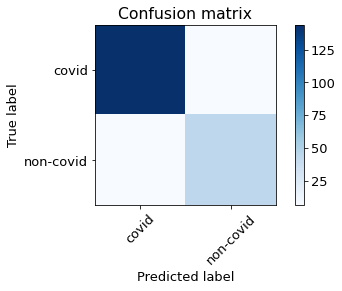

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       150
           1       0.88      0.88      0.88        50

    accuracy                           0.94       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.94      0.94      0.94       200



In [48]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report




# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

print('Performance of model with Pre-training.')
print('-----------------------------------------------------------------------------------------------')
print('                                                                                                ')
pred=predict
y_true= np.argmax(y_test,axis=1) 

score = metrics.accuracy_score(y_true, pred)

print("Accuracy score: {}".format(score))


score = metrics.precision_score(y_true, pred, average= "weighted")
print("Precision score: {}".format(score))

score = metrics.recall_score(y_true, pred, average= "weighted")
print("Recall score: {}".format(score))


score = metrics.f1_score(y_true, pred, average= "weighted")
print("F1 score: {}".format(score))


# Compute confusion matrix
cm = confusion_matrix(y_true, pred)
print(cm)


print('Plotting confusion matrix')

lab =['covid','non-covid']
plt.figure()
plot_confusion_matrix(cm, lab)
plt.show()


print(classification_report(y_true, pred))
